In [1]:
!pip install scikit-learn numpy pandas matplotlib seaborn tensorflow keras mlxtend

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 37.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 70.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py

# Práctica de machine learning
En esta práctica realizaréis el entrenamiento de 3 tipos de arquitecturas: 
- SVM
- Ensemble
- Redes neuronales Secuenciales

## Parte I: Entrenar un SVM basado en el dataset iris

In [19]:
# Librerías importadas
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions


In [20]:
# Carga del dataset de Iris
iris = datasets.load_iris()
x = iris.data
y = iris.target
column_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Crear el DataFrame con los datos
df = pd.DataFrame(x, columns=column_names)
# TODO figure out what the target is
# Agregar la columna de etiquetas
df['target'] = y

# Visualizar las primeras filas del DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**1) Separar el dataset en train y test** 


In [21]:
# TODO, why we have x any y and a DataFrame?
# TODO check if it's not better to split into 3 datasets
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


**2) LLamar a la arquitectura de Support Vector Machines** dejando los hiperparámetros por defecto

In [22]:
# Create an SVM model with default parameters
svm_model = SVC()

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Display the model
print(svm_model)

SVC()


**3) Usar el test set para evaluar la capacidad de inferir del modelo datos nunca vistos**

**4) Crear una matriz de confusión con las predicciones del modelo sobre el test set**


## Parte II: Reglas explícitas versus Aprendizaje automático

En las celdas subsiguientes os voy a presentar como se haría los cortes de hiperplanos manualmente. Vosotros después tenéis que entrenar un modelo de aprendizaje automático SVM para llegar a mejores resultados sin tener que haber definido reglas explícitas para la clasificación, más allá de la propia configuración de la arquitectura

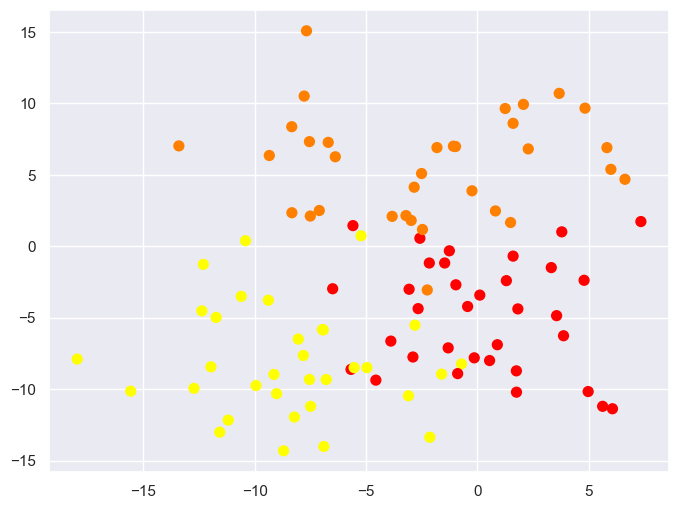

In [23]:
# Creamos un dataset aleatorio
X, y = make_blobs(n_samples=100, centers=3,
                  random_state=100, cluster_std=4)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
xfit = np.linspace(-1, 3.5, 100)



### Reglas explícitas

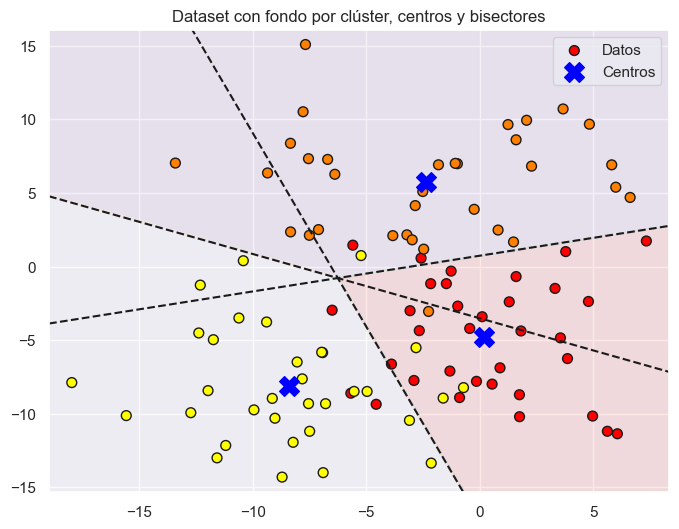

In [24]:

# Centros de cada clúster
unique_labels = np.unique(y)
centers = np.array([X[y == label].mean(axis=0) for label in unique_labels])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Malla de puntos
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Asignamos a cada punto de la malla el clúster cuya distancia al centro es mínima (diagrama de Voronoi)
distances = np.array([np.linalg.norm(grid_points - center, axis=1)
                      for center in centers])
cluster_pred = np.argmin(distances, axis=0).reshape(xx.shape)

# Graficar el bisector entre dos centros
def plot_bisector(A, B):
    # Punto medio entre A y B
    M = (A + B) / 2
    # Evitamos división por cero si los puntos tienen la misma x
    if B[0] - A[0] != 0:
        slope = (B[1] - A[1]) / (B[0] - A[0])
        if slope != 0:
            bisector_slope = -1 / slope
            x_vals = np.linspace(x_min, x_max, 200)
            y_vals = bisector_slope * (x_vals - M[0]) + M[1]
            plt.plot(x_vals, y_vals, '--k', lw=1.5)
        else:
            # Si la línea que une A y B es horizontal, la perpendicular es vertical
            plt.axvline(M[0], linestyle='--', color='k', lw=1.5)
    else:
        # Si están alineados verticalmente, la perpendicular es horizontal
        plt.axhline(M[1], linestyle='--', color='k', lw=1.5)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, cluster_pred, alpha=0.3, cmap='Pastel1')

# Poner la leyenda
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k', label='Datos')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, marker='X', label='Centros')

# Líneas bisectrices entre cada par de centros
for (i, j) in combinations(range(len(centers)), 2):
    plot_bisector(centers[i], centers[j])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Dataset con fondo por clúster, centros y bisectores")
plt.legend()
plt.show()

### Entrenamiento del SVM de aprendizaje automático con kernel lineal y una función de decisión One versus Rest

In [ ]:
# TODO understand what is a SVM with linear kernel and One vs rest


In [25]:
# Graficar el resultado y entender las fronteras de corte del hiperplano
# Malla de visualización
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predicción de cada clase
Z = svm_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Graficar regiones de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')  # Fondo coloreado según la predicción
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k', label='Datos')

# Vectores de soporte
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='blue', label='Vectores de soporte')

# 6. Fronteras de decisión usando un contorno basado en la predicción de clases.
plt.contour(xx, yy, Z, colors='k', linewidths=1, linestyles='--')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("SVM lineal: Planos de corte y vectores de soporte")
plt.legend()
plt.show()

ValueError: X has 2 features, but SVC is expecting 4 features as input.

## Parte III: Ensembling 

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

**1) Separar train de test para random state 42 y un porcentaje de test del 20% y luego mostrar la forma de cada dataset**

**2) Definir 3 algortimos:** 
- Una regresión logística con 100 iteraciones
- Un árbol de decisión con todos los hiperparámetros por defecto
- Una arquitectura de Naive Bayes gaussiana

**3) Entrenar cada modelo con una validación cruzada de 5 folds**

**4) Crear un modelo de ensemble con la clase VotingClassifier de scikit-learng con opción de voto "hard"**

In [ ]:
# TODO understand the diifference between soft voting and hard voting

**5) Ahora definir otros 3 algoritmos:**
- Un árbol de decisión regularizado a un nivel de profundidad, con un random state 0 y con la función de pérdida como entropía
- Un multilayer perceptron con 3 hidden layers, un random state de 10, un learning rate de 0.1, un batch size de 10 y un máximo de iteraciones de 100
- Un random forest con dos árboles de decisión y un random state de 10

**6) Generar un ensemble de los 3 con soft voting**

**7) Predecir los resultados del ensemble**

**8) Plottear la Confusion Matrix**

## Parte IV: Redes neuronales secuenciales (DNNs)
El objetivo es que entrenéis diferentes tipos de redes neuronales basándose en su complejidad en términos de neuronas, capas de profunidad y regularización

In [ ]:
# Generar datos concéntricos
X, y = make_circles(n_samples=100, noise=0.1, factor=0.25, random_state=101)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

**1) Entrenar una red secuencial densa de una sola hidden layer**
- *Pista: la input layer tiene una shape de (2,) y la output layer tiene una activación "sigmoide"*
- *Instrucción adicional --> Compilad el modelo con el optimizador Adam, la función de pérdida de MSE y con la métrica accuracy*

In [ ]:
# Crear la arquitectura
model =

**2) Mostrar el resumen del número de parámetros entrenables**

**3) Entrenar el modelo con un 20% del test y un número de épocas de 300**

In [ ]:
# Entrenar el modelo
history = 

In [ ]:
# Este es el plot de los resultados
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


**4) Evaluar el rendimiento del modelo**


In [ ]:
test_results = 

In [ ]:
# Visualizar el umbral de decisión del modelo
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

**5) Realizar el mismo procedimiento para:**

- 2 neuronas con una sola capa densa
- 10 neuronas con una sola capa densa
- 5 Neuronas con en dos capas densas distribuidas en 3 y 2 neuronas por cada capa densa
- Analizar los resultados y la comparativa con respecto a la relación nº de parámetros/rendimiento/profundad de la red